# Author Identification
#### Carl Moser, Matthew Beaudouin-Lafon

We did stuff to do things with doodas.

In [5]:
from thinkbayes2 import Suite
from pickle import load
import thinkplot

def getPickle(fileName):
    infile = open(fileName, 'rb+')
    chain = load(infile)
    wordCount = load(infile)
    author = load(infile)
    infile.close()
    return (chain, wordCount, author)

def isWorthChecking(prevWord, word):
    """
    Checks whether a word is useful for bayesian update.
    A word is useful if it is found in the Markov Chain. 
    """
    worth = True
    for author, prob in authorId.Items():
        chain = authorId.markovChains[author][0]
        worth = worth and (bool(chain.get(prevWord)) 
                      and bool(chain[prevWord].get(word)))
        
    return worth

class AuthorId(Suite):
    """
    Bayesian model for author identification. Uses Markov chains generated from texts who's authors are known as a likelihood function.
    Has a list of {author : MarkovChain objects}
    """
                
    def Likelihood(self, data, hypo):
        """
        data: (string, string)
        hypo: (Markov Chain, Word Count dictionary, Author)
        """
        hypoAuthor = hypo
        chain, wordCount = self.markovChains[hypoAuthor]
        prevWord, word = data
        
        if (chain.get(prevWord) and chain[prevWord].get(word)):
            like = chain[prevWord][word]/float(wordCount[prevWord])
        else:      
            like = -1 # If isWorthChecking fails, this will throw an error
            
        return like

In [6]:
# files = ['Frankenstein', 'GreatExpecations', 'Hamlet', 'MobyDick', 'PierreAmbiguities', 'RomeoAndJuliet']
files = ['Frankenstein.dat', 'GreatExpectations.dat', 'RomeoAndJuliet.dat', 'MobyDick.dat', "The Hitch Hiker's Guide to the Galaxy.dat", 'Twilight.dat']

authorId = AuthorId()
authorId.markovChains = {}

for f in files:
    chain, wordCount, author = getPickle(f)
    authorId[author] = 1
    authorId.markovChains[author] = (chain, wordCount)

In [7]:
f = open('testText.dat', 'rb')
testText = load(f)
f.close()

In [8]:
for author, prob in authorId.Items():
    authorId[author] = 1
    
authorId.Normalize()
maryV = []
charlesV = []
shakeV = []
totalWords = 0
for sentence in testText:
    sentence = ['*'] + sentence
    for i in range(len(sentence) - 1):
        totalWords += 1
            
        if isWorthChecking(sentence[i], sentence[i + 1]):
            authorId.Update((sentence[i], sentence[i + 1]))
            
        #Testing        
#         if totalWords == 233:
#         print((sentence[i], sentence[i + 1]), isWorthChecking(sentence[i], sentence[i + 1]))
            
        maryV.append(authorId['Mary Shelley'])
        charlesV.append(authorId['Charles Dickens'])
        shakeV.append(authorId['Shakespeare'])
        
for key, value in authorId.Items():
    print(key, value)

Herman Melville 0.16666666666666666
Douglas Adams 0.16666666666666666
Mary Shelley 0.16666666666666666
Stephenie Meyer 0.16666666666666666
Charles Dickens 0.16666666666666666
Shakespeare 0.16666666666666666


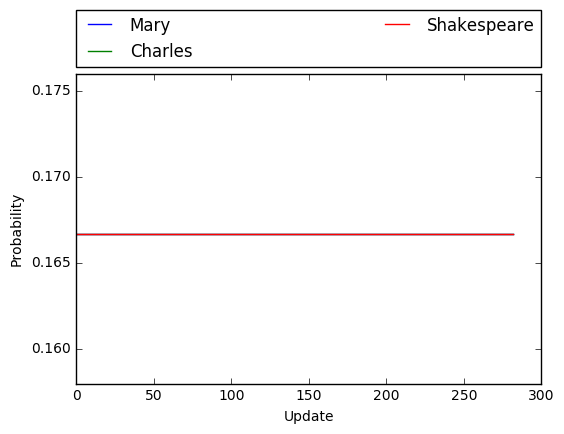

In [10]:
import matplotlib.pyplot as plt

#for i in (shakeV):
#    print(str(i) + ', ')
x = range(0, len(maryV))
plt.xlabel('Update')
plt.ylabel('Probability')
plt.plot(x, maryV, label='Mary')
plt.plot(x, charlesV, label='Charles')
plt.plot(x, shakeV, label='Shakespeare')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()
plt.clf()
# for fuck, shit in zip(maryV, charlesV):
#     print(fuck, shit)
# authorId

In [11]:
chainC = authorId.markovChains['Charles Dickens'][0]
countC = authorId.markovChains['Charles Dickens'][1]

chainM = authorId.markovChains['Mary Shelley'][0]
countM = authorId.markovChains['Mary Shelley'][1]

chainS = authorId.markovChains['Shakespeare'][0]
countS = authorId.markovChains['Shakespeare'][1]

print(chainS['when']['i'])

12


Questions:
    - What to do with words that aren't there?
    - "To" appears a lot more than other words. Should it be weighed differently?
    - Integrate sentence lengths